### 종목코드

In [2]:
import pandas as pd

In [4]:
# https://kind.krx.co.kr/corpgeneral/corpList.do?method=loadInitPage
krx_list = pd.read_html('C:/Users/201910810/workspace/Study/stock/data/상장법인목록.xls')

In [24]:
krx_list[0]['종목코드'] = krx_list[0].종목코드.map('{:06d}'.format)

In [26]:
krx_list[0].sort_values(by = '종목코드', inplace = True)

In [30]:
krx_list[0][krx_list[0]['회사명'] == '켐온']

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
787,켐온,217600,자연과학 및 공학 연구개발업,비임상연구시험대행,2015-06-26,12월,송시환,http://www.chemon.co.kr,경기도


### 웹 스크래핑

In [100]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re

excutable_path = "C:/chromedriver.exe"
source_url = 'https://finance.naver.com/item/sise_day.nhn?code=217600&page=1' # 켐온

driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows
driver.get(source_url)
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
pgrr = soup.find('td', class_ = 'pgRR') # page Right Right
last_page = str(pgrr.a['href']).split('=')[-1]

print(last_page)

<ipython-input-100-e1ed94286aa0>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows


160


In [199]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=217600' # 켐온

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    driver.get(page_url)
    df = df.append(pd.read_html(driver.page_source, header=0)[0], ignore_index = True)

df = df.dropna().reset_index().drop('index', axis = 1)

In [162]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2021.12.24,3800.0,255.0,4300.0,4400.0,3775.0,26135113.0
1,2021.12.23,4055.0,935.0,3130.0,4055.0,3120.0,42364196.0
2,2021.12.22,3120.0,30.0,3180.0,3275.0,3120.0,4003451.0
3,2021.12.21,3150.0,170.0,3300.0,3315.0,3120.0,2135174.0
4,2021.12.20,3320.0,240.0,3240.0,3480.0,3200.0,10764502.0
...,...,...,...,...,...,...,...
1595,2015.07.02,2135.0,15.0,2120.0,2140.0,2110.0,74609.0
1596,2015.07.01,2120.0,40.0,2085.0,2140.0,2085.0,353130.0
1597,2015.06.30,2080.0,5.0,2085.0,2085.0,2065.0,106965.0
1598,2015.06.29,2085.0,30.0,2040.0,2090.0,2025.0,281019.0


### 시고저종

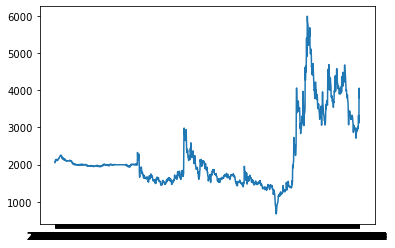

In [167]:
from matplotlib import pyplot as plt
# close 그래프
df = df.sort_values(by='날짜')

plt.plot(df['날짜'], df['종가'])
plt.show()         

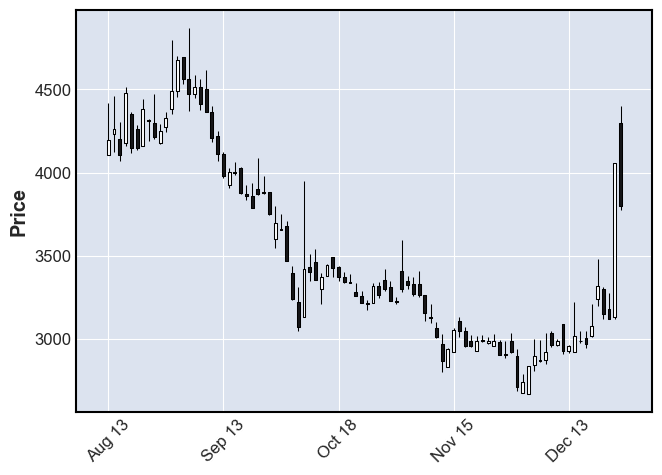

In [206]:
import mplfinance as mpf

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=217600' # 켐온

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    driver.get(page_url)
    df = df.append(pd.read_html(driver.page_source, header=0)[0], ignore_index = True)

df = df.dropna().reset_index().drop('index', axis = 1)

df = df.iloc[0:90]
df = df.rename(columns = {'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df = df.sort_values(by='Date')

mpf.plot(df, type= 'candle')

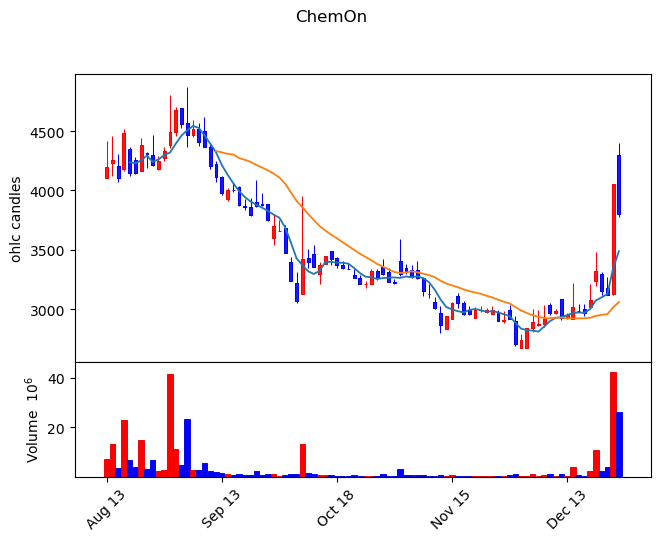

In [215]:
kwargs = dict(title = 'ChemOn', type = 'candle', mav = (5, 20), volume=True, ylabel = 'ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)